<a href="https://colab.research.google.com/github/Kiritiaajd/JavaDSA/blob/main/Mental_stress_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
daily_data = pd.read_csv('/content/daily_fitbit_sema_df_unprocessed.csv')
hourly_data = pd.read_csv('/content/hourly_fitbit_sema_df_unprocessed.csv')
 # metal_illnesses = pd.read_csv('/content/1- mental-illnesses-prevalence.csv')
num_lines = len(daily_data)
num_lines


<ipython-input-7-7ad02de5a5cc>:2: DtypeWarning: Columns (5,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_data = pd.read_csv('/content/hourly_fitbit_sema_df_unprocessed.csv')


7410

In [ ]:
hourly_data.head()

,Unnamed: 0,id,date,hour,temperature,badgeType,calories,distance,activityType,bpm,...,TENSE/ANXIOUS,TIRED,ENTERTAINMENT,GYM,HOME,HOME_OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL
0,0,621e2e8e67b776a24055b564,2021-05-24,0.0,-1.466659,NaN,89.04,98.3,NaN,66.874763,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,621e2e8e67b776a24055b564,2021-05-24,1.0,0.210289,NaN,65.62,0.0,NaN,58.711364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,621e2e8e67b776a24055b564,2021-05-24,2.0,-1.359378,NaN,65.40,NaN,NaN,55.133495,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,621e2e8e67b776a24055b564,2021-05-24,3.0,-0.316295,NaN,69.01,11.0,NaN,60.488613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,621e2e8e67b776a24055b564,2021-05-24,4.0,0.416455,NaN,65.73,0.0,NaN,59.110638,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title Year

from matplotlib import pyplot as plt
metal_illnesses['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

NameError: name 'metal_illnesses' is not defined

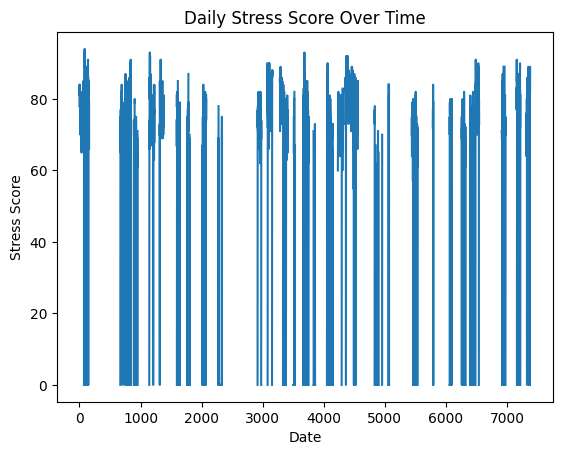

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'date' is the index and 'stress_score' is the column
daily_data['stress_score'].plot(kind='line', title='Daily Stress Score Over Time')
plt.xlabel('Date')
plt.ylabel('Stress Score')
plt.show()


# HOURLY DATA SET PLOT FOR TEMPERATURE WITH TIME



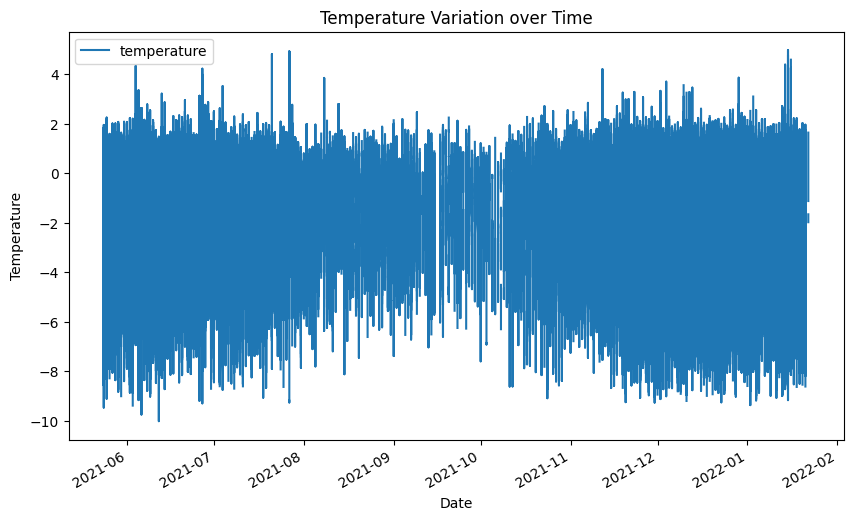

In [ ]:

hourly_data['date'] = pd.to_datetime(hourly_data['date']) # Convert 'date' column to datetime format
hourly_data.plot(x='date', y='temperature', kind='line', figsize=(10, 6))
plt.title('Temperature Variation over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()


# ***Distance vs calories from hourly data set***
***bold text***

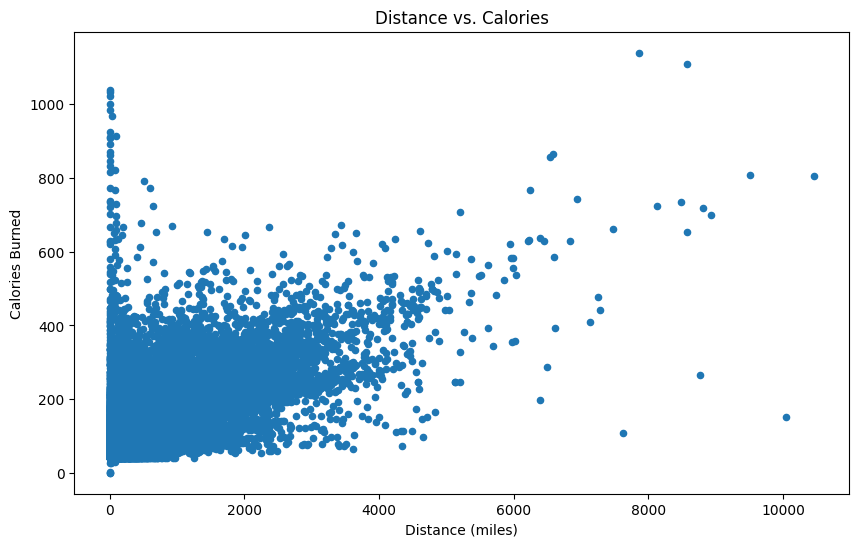

In [ ]:
hourly_data.plot.scatter(x='distance', y='calories', figsize=(10, 6))
plt.title('Distance vs. Calories')
plt.xlabel('Distance (miles)')
plt.ylabel('Calories Burned')
plt.show()


In [ ]:
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122542 entries, 0 to 122541
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   Unnamed: 0                    122542 non-null  int64         
 1   id                            122542 non-null  object        
 2   date                          122542 non-null  datetime64[ns]
 3   hour                          122542 non-null  float64       
 4   temperature                   74777 non-null   float64       
 5   badgeType                     521 non-null     object        
 6   calories                      122503 non-null  float64       
 7   distance                      82083 non-null   float64       
 8   activityType                  3482 non-null    object        
 9   bpm                           84601 non-null   float64       
 10  mindfulness_session           122542 non-null  bool          
 11  scl_avg      

In [ ]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7410 entries, 0 to 7409
Data columns (total 63 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        7410 non-null   int64  
 1   id                                7410 non-null   object 
 2   date                              7410 non-null   object 
 3   nightly_temperature               3359 non-null   float64
 4   nremhr                            2475 non-null   float64
 5   rmssd                             2475 non-null   float64
 6   spo2                              1270 non-null   float64
 7   full_sleep_breathing_rate         2495 non-null   float64
 8   stress_score                      1876 non-null   float64
 9   sleep_points_percentage           1876 non-null   float64
 10  exertion_points_percentage        1876 non-null   float64
 11  responsiveness_points_percentage  1876 non-null   float64
 12  daily_

In [ ]:
# Check for missing values in the daily data
daily_missing = daily_data.isnull().sum()

# Check for missing values in the hourly data
hourly_missing = hourly_data.isnull().sum()

daily_missing, hourly_missing

(Unnamed: 0                0
 id                        0
 date                      0
 nightly_temperature    4051
 nremhr                 4935
                        ... 
 HOME_OFFICE            5120
 OTHER                  5120
 OUTDOORS               5120
 TRANSIT                5120
 WORK/SCHOOL            5120
 Length: 63, dtype: int64,
 Unnamed: 0                          0
 id                                  0
 date                                0
 hour                                0
 temperature                         0
 badgeType                       34250
 calories                           14
 distance                         1458
 activityType                    33139
 bpm                               176
 mindfulness_session                 0
 scl_avg                         34269
 steps                            1458
 minutes_in_default_zone_1       32930
 minutes_below_default_zone_1    32930
 minutes_in_default_zone_2       32930
 minutes_in_default_zone_3    

In [ ]:
# Fill missing health metrics with forward fill method for daily data
daily_data.fillna(method='ffill', inplace=True)

# For remaining NaN values, use backward fill as a fallback
daily_data.fillna(method='bfill', inplace=True)

# Repeat for hourly data
hourly_data.fillna(method='ffill', inplace=True)
hourly_data.fillna(method='bfill', inplace=True)

# Check if there are still any missing values
daily_missing_after = daily_data.isnull().sum()
hourly_missing_after = hourly_data.isnull().sum()

daily_missing_after, hourly_missing_after


(Unnamed: 0             0
 id                     0
 date                   0
 nightly_temperature    0
 nremhr                 0
                       ..
 HOME_OFFICE            0
 OTHER                  0
 OUTDOORS               0
 TRANSIT                0
 WORK/SCHOOL            0
 Length: 63, dtype: int64,
 Unnamed: 0                      0
 id                              0
 date                            0
 hour                            0
 temperature                     0
 badgeType                       0
 calories                        0
 distance                        0
 activityType                    0
 bpm                             0
 mindfulness_session             0
 scl_avg                         0
 steps                           0
 minutes_in_default_zone_1       0
 minutes_below_default_zone_1    0
 minutes_in_default_zone_2       0
 minutes_in_default_zone_3       0
 age                             0
 gender                          0
 bmi                  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
daily_data['date'] = pd.to_datetime(daily_data['date'])
hourly_data['date'] = pd.to_datetime(hourly_data['date'])

# Preprocess the datasets
# Merge the daily and hourly datasets on 'id' and 'date'
merged_data = pd.merge(daily_data, hourly_data, on=['id', 'date'], how='inner')

# Handle missing values - simple method: fill with mean or drop
merged_data.fillna(merged_data.mean(numeric_only=True), inplace=True)

# Check which categorical columns are actually present in the merged dataset
categorical_cols = ['activityType', 'badgeType']  # add other categorical columns if necessary
present_categorical_cols = [col for col in categorical_cols if col in merged_data.columns]

# Encode categorical variables if necessary (dummy encoding for example)
if present_categorical_cols:
    merged_data = pd.get_dummies(merged_data, columns=present_categorical_cols, drop_first=True)

# Ensure all features are numeric
non_numeric_cols = merged_data.select_dtypes(include=['object']).columns
merged_data[non_numeric_cols] = merged_data[non_numeric_cols].apply(pd.to_numeric, errors='coerce')

# Drop remaining non-numeric columns that could not be converted
merged_data.drop(columns=non_numeric_cols, inplace=True)

# Ensure columns 'id' and 'date' are present before dropping
columns_to_drop = ['id', 'date', 'stress_score']
present_columns_to_drop = [col for col in columns_to_drop if col in merged_data.columns]

# Select target and features
if 'stress_score' in merged_data.columns:
    X = merged_data.drop(columns=present_columns_to_drop, axis=1)  # Features
    y = merged_data['stress_score']  # Target
else:
    raise KeyError("The target column 'stress_score' is not in the dataset")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       398
        56.0       1.00      1.00      1.00         2
        58.0       1.00      1.00      1.00        13
        59.0       1.00      1.00      1.00         3
        61.0       1.00      1.00      1.00        10
        62.0       1.00      1.00      1.00        16
        63.0       1.00      1.00      1.00       316
        64.0       1.00      1.00      1.00        31
        65.0       1.00      1.00      1.00        24
        66.0       1.00      1.00      1.00       279
        67.0       1.00      1.00      1.00        53
        68.0       1.00      1.00      1.00       344
        69.0       1.00      1.00      1.00       394
        70.0       1.00      1.00      1.00      1646
        71.0       1.00      1.00      1.00       116
        72.0       1.00      1.00      1.00       134
        73.0       1.00      1.00      1.00 

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

# Print cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")


Cross-Validation Scores: [0.47741467 0.77458243 0.79244735 0.787914   0.59035445]
Mean Cross-Validation Score: 0.6845425786041707


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


NameError: name 'rf_clf' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict on the test set
y_pred = rf_clf.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Confusion Matrix:
[[398   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0   0  13 ...   0   0   0]
 ...
 [  0   0   0 ...   6   0   0]
 [  0   0   0 ...   0   5   0]
 [  0   0   0 ...   0   0   6]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       398
        56.0       1.00      1.00      1.00         2
        58.0       1.00      1.00      1.00        13
        59.0       1.00      1.00      1.00         3
        61.0       1.00      1.00      1.00        10
        62.0       1.00      1.00      1.00        16
        63.0       1.00      1.00      1.00       316
        64.0       1.00      1.00      1.00        31
        65.0       1.00      1.00      1.00        24
        66.0       1.00      1.00      1.00       279
        67.0       1.00      1.00      1.00        53
        68.0       1.00      1.00      1.00       344
        69.0       1.00      1.00      1.00       394
        70

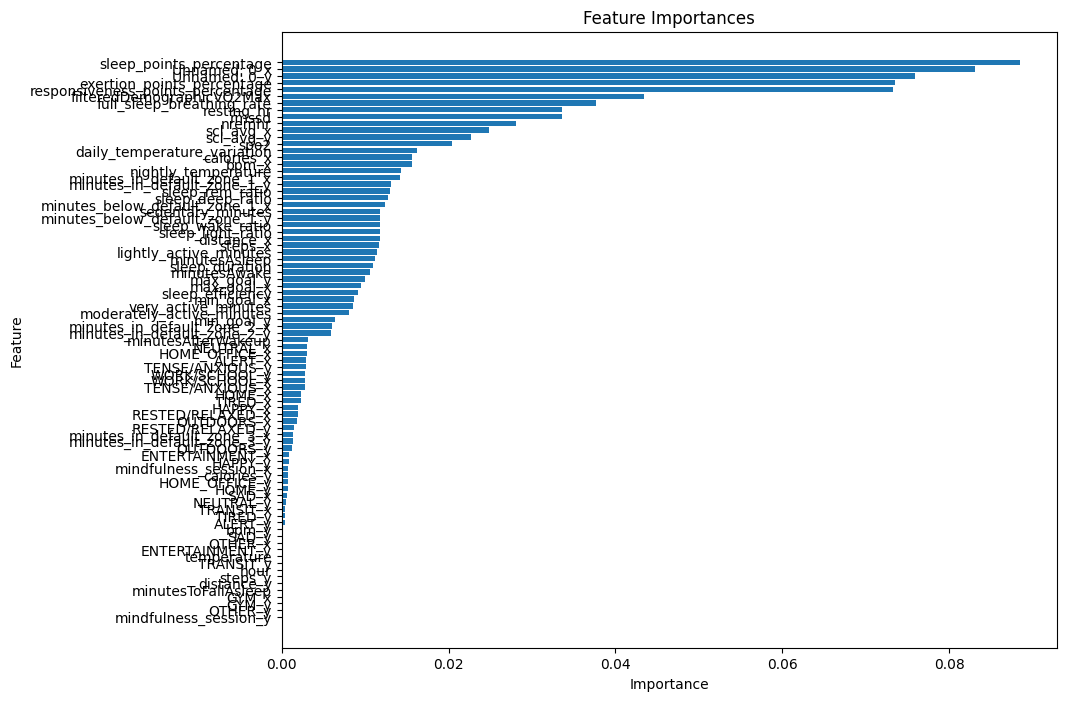

In [ ]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# Train a new Random Forest with adjusted parameters
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

# Evaluate the model again
y_pred = rf_clf.predict(X_test)

# Print the accuracy
print(f"Accuracy: {rf_clf.score(X_test, y_test)}")

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       398
        56.0       1.00      1.00      1.00         2
        58.0       1.00      1.00      1.00        13
        59.0       1.00      1.00      1.00         3
        61.0       1.00      1.00      1.00        10
        62.0       1.00      1.00      1.00        16
        63.0       1.00      1.00      1.00       316
        64.0       1.00      1.00      1.00        31
        65.0       1.00      1.00      1.00        24
        66.0       1.00      1.00      1.00       279
        67.0       1.00      1.00      1.00        53
        68.0       1.00      1.00      1.00       344
        69.0       1.00      1.00      1.00       394
        70.0       1.00      1.00      1.00      1646
        71.0       1.00      1.00      1.00       116
        72.0       1.00      1.00      1.00       134
        73.0       1.00      1.00      1.00 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train with the best parameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV with a smaller grid
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Get best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train with the best parameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9999636891793755


RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_clf, param_distributions=param_dist, n_iter=20, cv=3, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit random search
random_search.fit(X_train, y_train)

# Get best parameters and score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")

# Train with the best parameters
best_rf_clf = random_search.best_estimator_
best_rf_clf.fit(X_train, y_train)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
Best Cross-Validation Score: 0.9999636891793755


RandomForestClassifier(max_depth=20, min_samples_split=5, random_state=42)